#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Loading the dataset

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### With PCA

- Doing the basic EDA

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.shape

(150, 5)

- Dividing the data for the features and the target variable
- Features:
    - Sepal Length
    - Sepal Width
    - Petal Length
    - Petal Width
- Target:
    - Species

In [5]:
X=df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y=df.iloc[:,4]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### Apply scaler
- Scaling is important before applying PCA because PCA is sensitive to the scale of the features. Standardizing the data ensures that all features contribute equally to the principal components by removing differences in scale and variance. This prevents features with larger scales from dominating the principal components solely due to their magnitude.

In [7]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(X)
scaled_df

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

- Calculating the covariance matrix is necessary in PCA to understand the relationships between different features by quantifying their pairwise variations. Transposing the scaled data matrix ensures that each row represents a feature, allowing covariance calculations across features rather than observations.

In [8]:
covariance_matrix=np.cov(scaled_df.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

- Computing the eigenvalues and eigenvectors of the covariance matrix is essential in PCA to determine the principal components, which represent the directions of maximum variance in the dataset. These eigenvectors form a new orthogonal basis that captures the most significant axes of variation in the data.

In [9]:
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)

In [10]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print("Eigenvalues arranges in descending order:")
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranges in descending order:
2.9380850501999944
0.920164904162487
0.14774182104494823
0.020853862176461877


#### Applying PCA

In [11]:
pca=PCA()
pca=pca.fit(scaled_df)
explained_variance=pca.explained_variance_ratio_

- The explained_variance_ratio_ indicates the proportion of variance captured by each principal component, aiding in feature selection or dimensionality reduction decisions. Higher values suggest that the corresponding principal component retains more information about the original dataset, guiding the choice of the number of components to retain.

In [12]:
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [13]:
df1=pd.DataFrame({'Principal Component':['PC1','PC2','PC3','PC4'],
                       'Variance':pca.explained_variance_ratio_,})

In [14]:
df1

,Principal Component,Variance
0,PC1,0.729624
1,PC2,0.228508
2,PC3,0.036689
3,PC4,0.005179


In [35]:
pca_2=PCA(n_components=3)
pca_2=pca_2.fit(scaled_df)
pca_2d=pca_2.transform(X)

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


#### Dividing the data into training and testing 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(pca_2d, y, test_size=0.2, random_state=42)

#### Applying Supervised Machine Learning Model

In [38]:
#SVM
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

1.0

#### Without PCA

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [42]:
#SVM
model_svm_1 = SVC(random_state=42)
model_svm_1.fit(X_train_std, y_train)
y_pred_svm_1= model_svm_1.predict(X_test_std)
accuracy_svm_1 = accuracy_score(y_test, y_pred_svm_1)
accuracy_svm_1

1.0

#### Applying advanced EDA

<Axes: xlabel='Principal Component', ylabel='Variance'>

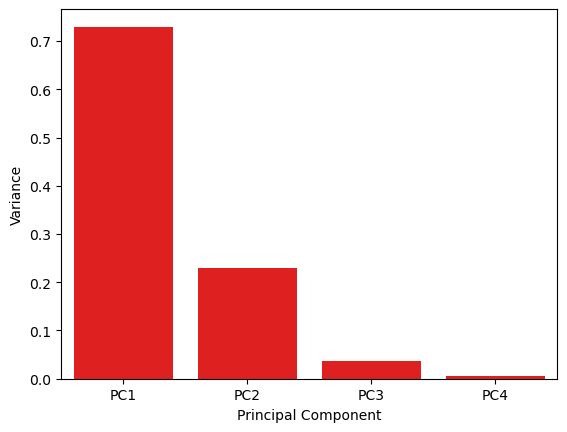

In [43]:
sns.barplot(x='Principal Component',y='Variance',data=df1,color="r")

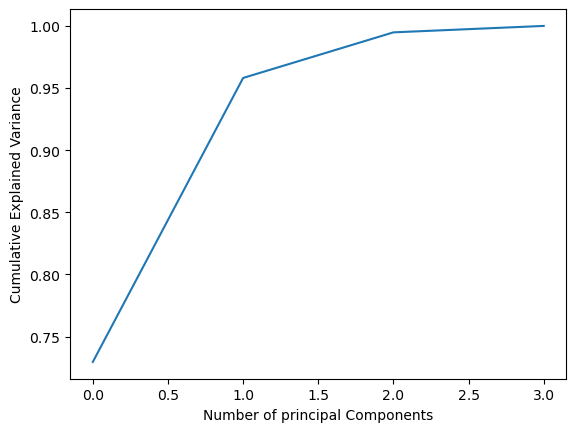

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [45]:
df['species']=df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

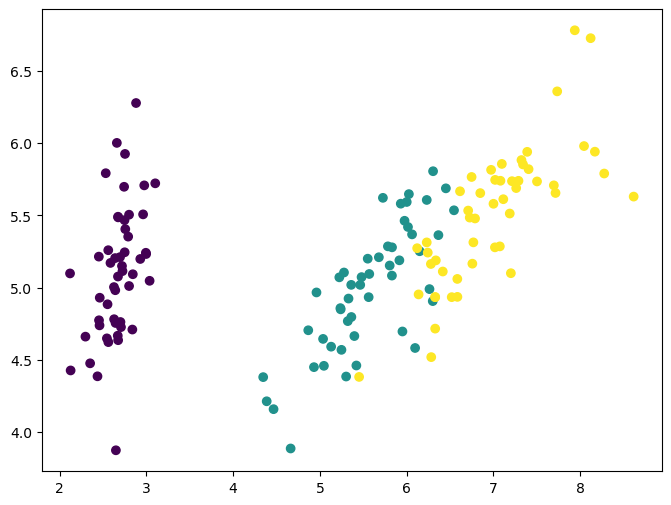

In [46]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=df['species'])
plt.show()

#### Observations

- Applying PCA to the Iris dataset revealed insightful observations regarding dimensionality reduction and classification performance. The analysis showed that PCA effectively reduced the dataset's dimensionality while preserving a significant portion of the original variance. With just two principal components, the reduced-dimensional representation retained over 95% of the variance, indicating that the dataset's essential information could be captured in a lower-dimensional space. Furthermore, visualizing the data after PCA transformation demonstrated clear separation among the iris species in the reduced-dimensional space, highlighting the discriminative power of the principal components. Classification experiments using logistic regression and SVM classifiers revealed comparable accuracy scores with and without PCA, suggesting that the reduced feature space maintained sufficient discriminative information for accurate classification. Overall, PCA facilitated dimensionality reduction without significant loss of information, enabling efficient computation and preserving the dataset's essential characteristics for classification tasks.